In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
test_preds = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/3_Threshold_Probability/End_Models/LogisticRegression_TFIDF-Vectorization_preds.csv')

In [3]:
y_true=test_preds.Y_test
y_pred=test_preds.Y_pred

## Plot confusion matrices - Test Set

### Overall

In [4]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pylab as pldata

In [5]:
cm = confusion_matrix(y_true, y_pred)
display_labels = [0,1]

In [6]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65       472
           1       0.41      0.65      0.50       220

    accuracy                           0.59       692
   macro avg       0.59      0.61      0.58       692
weighted avg       0.66      0.59      0.60       692



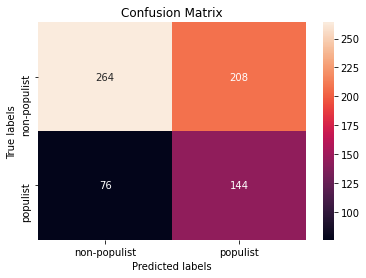

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non-populist', 'populist']); ax.yaxis.set_ticklabels(['non-populist', 'populist']);
plt.savefig('cm_end_model_rf_occ_all.png')

In [8]:
len(test_preds.loc[test_preds['Y_test'] == 0])

472

### Per Text Category

In [9]:
test_preds.Category.unique()

array(['PressRelease', 'Past_PartyMan', 'PartyMan', 'SocialMedia'],
      dtype=object)

In [10]:
test_preds_PRESS = test_preds.loc[test_preds['Category'] == 'PressRelease']
test_preds_PAST_PARTYMAN = test_preds.loc[test_preds['Category'] == 'Past_PartyMan']
test_preds_PARTYMAN =  test_preds.loc[test_preds['Category'] == 'PartyMan']
test_preds_SOCIALMEDIA = test_preds.loc[test_preds['Category'] == 'SocialMedia']

In [11]:
def plot_cm(df, name):
    
    y_true = df.Y_test
    y_pred = df.Y_pred
    
    cm = confusion_matrix(y_true, y_pred)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix '+ name); 
    ax.xaxis.set_ticklabels(['non-populist', 'populist']); ax.yaxis.set_ticklabels(['non-populist', 'populist']);
    plt.savefig('cm_end_model_rf_cat_' + name + '.png')

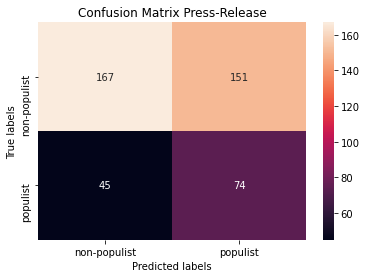

In [12]:
plot_cm(test_preds_PRESS, 'Press-Release')

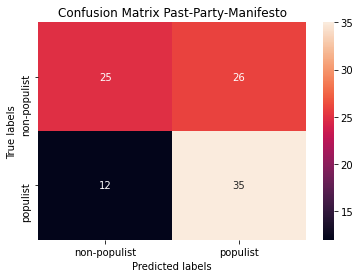

In [13]:
plot_cm(test_preds_PAST_PARTYMAN, 'Past-Party-Manifesto')

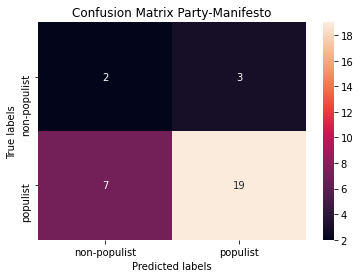

In [14]:
plot_cm(test_preds_PARTYMAN, 'Party-Manifesto')

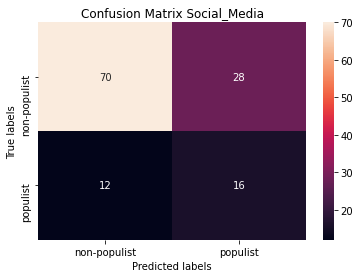

In [15]:
plot_cm(test_preds_SOCIALMEDIA, 'Social_Media')

## Per Populist Dimension

In [17]:
test_preds_pc = test_preds.loc[(test_preds.POPULIST_PeopleCent == 1) & (test_preds.POPULIST_AntiElite == 0) & (test_preds.POPULIST_Sovereign == 0)]
#test_pred_ae = merged_df.loc[merged_df.POPULIST_AntiElite == 1]
#test_pred_sov = merged_df.loc[merged_df.POPULIST_Sovereign == 1]
#merged_df_sov['POPULIST'] = merged_df_sov.POPULIST.astype(int)
#merged_df_sov['label'] = merged_df_sov.label.astype(int)

In [23]:
test_preds_pc

,Unnamed: 0,Content,POPULIST_PeopleCent,POPULIST_AntiElite,POPULIST_Sovereign,Country,Category,Y_test,Y_pred
7,72,"Statt sie zu fördern, haben SPÖ und ÖVP Leistu...",1.0,0.0,0.0,au,PartyMan,1,1
33,740,Denn wir arbeiten für die Interessen und das W...,1.0,0.0,0.0,au,PressRelease,1,1
34,1546,A=text B=newspaper A. Die Legislaturziele 1975...,1.0,0.0,0.0,cd,Past_PartyMan,1,1
42,1550,Aber auch unsere Partei hat ihr Programm und i...,1.0,0.0,0.0,cd,Past_PartyMan,1,1
49,1737,Text-ID: cd_pr_el_11_050024.txt Press Release ...,1.0,0.0,0.0,cd,PressRelease,1,0
...,...,...,...,...,...,...,...,...,...
649,2065,"Als ein freier Mensch sage ich: In einem Land,...",1.0,0.0,0.0,de,SocialMedia,1,0
650,2105,Anders kann ich ihre Äußerungen in der Rheinis...,1.0,0.0,0.0,de,SocialMedia,1,0
651,2129,Dabei wird es mit einer rein quantitativen Zur...,1.0,0.0,0.0,de,SocialMedia,1,0
663,722,Die Attacken der Sozialisten lassen sich nur d...,1.0,0.0,0.0,au,PressRelease,1,1


In [24]:
def plot_cm(df, name):
    
    y_true=df.Y_test
    y_pred=df.Y_pred
    
    cm = confusion_matrix(y_true, y_pred)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix '+ name); 
    ax.xaxis.set_ticklabels(['non-populist', 'populist']); ax.yaxis.set_ticklabels(['non-populist', 'populist']);
    #plt.savefig('images/cm_label_model_' + name + '.png')

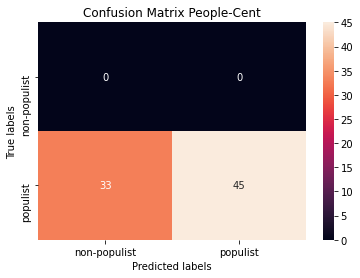

In [25]:
plot_cm(test_preds_pc, 'People-Cent')